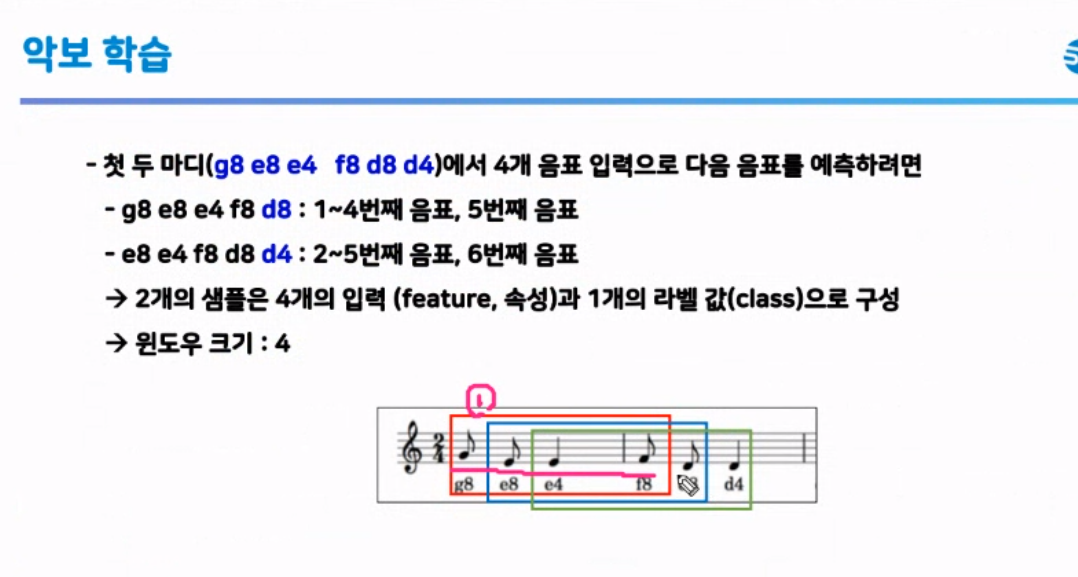

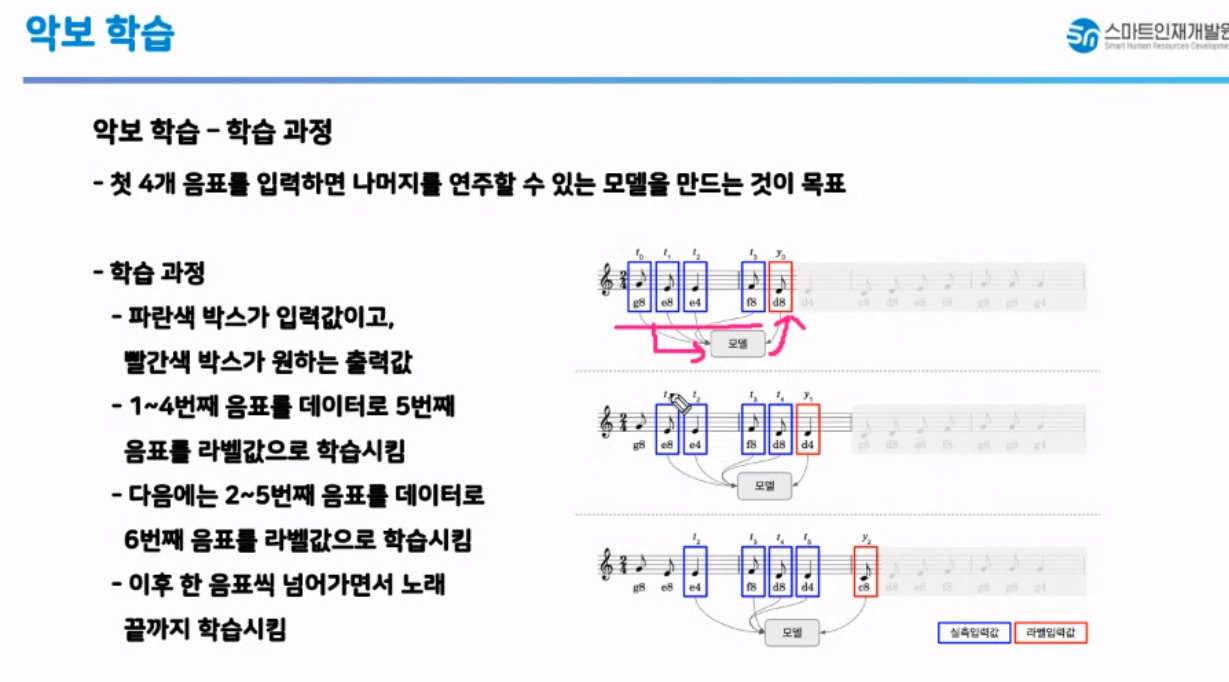

In [1]:
# 코드 기준 번호 정의
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}
# 번호 기준 코드 정의
idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}
# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8',
       'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4',
       'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8',
       'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8',
       'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8',
       'g8', 'e8', 'e8', 'e4']

# 소리변환 함수
# o : 옥타브, s : 음표
def freq(o, s):
    if s[0] == 'c':     return 524*2**o
    elif s[0] == 'd':   return 587*2**o
    elif s[0] == 'e':   return 659*2**o
    elif s[0] == 'f':   return 698*2**o
    elif s[0] == 'g':   return 784*2**o
    elif s[0] == 'a':   return 880*2**o
    elif s[0] == 'b':   return 988*2**o

from IPython.display import Audio, display
import numpy as np
import time
def single_tone(frequecy, s, sampling_rate=22050, duration=0.1):
    # frequency: 주파수
    # s : 음표 (4분음표, 8분음표)
    # sampling_rate: 초당 샘플링 데이터 수
    # duration: 지속 시간. 단위 초. 디폴트 1초
    t = np.linspace(0, duration, int(sampling_rate))
    y = np.sin(2 * np.pi * frequecy * t)
    time.sleep(s)
    return y
def play_sound(seq) :
  result = []
  for i in range(len(seq)) :
    # 딜레이를 조절하여 박자를 맞춤
    if seq[i][1] == "4" :
        result.append(single_tone(freq(2, seq[i]), 0.4))
    elif seq[i][1] == "8" :
        result.append(single_tone(freq(2, seq[i]), 0.2))
    octave = np.hstack(result)
  display(Audio(octave, rate=44100))

In [2]:
play_sound(seq)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
# 악보를 특성과 라벨 데이터 형태로 분리하는 함수
# seq 데이터를 window_size(특성 데이터 수)개수로 분리 
def seq2dataset(seq, window_size):
  dataset=[]

  for i in range(len(seq)- window_size):
    subset=seq[i: (i+window_size+1)]
    dataset.append([code2idx[item] for item in subset])

  return dataset

In [9]:
dataset=seq2dataset(seq,4)
dataset

[[11, 9, 2, 10, 8],
 [9, 2, 10, 8, 1],
 [2, 10, 8, 1, 7],
 [10, 8, 1, 7, 8],
 [8, 1, 7, 8, 9],
 [1, 7, 8, 9, 10],
 [7, 8, 9, 10, 11],
 [8, 9, 10, 11, 11],
 [9, 10, 11, 11, 4],
 [10, 11, 11, 4, 11],
 [11, 11, 4, 11, 9],
 [11, 4, 11, 9, 9],
 [4, 11, 9, 9, 9],
 [11, 9, 9, 9, 10],
 [9, 9, 9, 10, 8],
 [9, 9, 10, 8, 1],
 [9, 10, 8, 1, 7],
 [10, 8, 1, 7, 9],
 [8, 1, 7, 9, 11],
 [1, 7, 9, 11, 11],
 [7, 9, 11, 11, 9],
 [9, 11, 11, 9, 9],
 [11, 11, 9, 9, 2],
 [11, 9, 9, 2, 8],
 [9, 9, 2, 8, 8],
 [9, 2, 8, 8, 8],
 [2, 8, 8, 8, 8],
 [8, 8, 8, 8, 8],
 [8, 8, 8, 8, 9],
 [8, 8, 8, 9, 3],
 [8, 8, 9, 3, 9],
 [8, 9, 3, 9, 9],
 [9, 3, 9, 9, 9],
 [3, 9, 9, 9, 9],
 [9, 9, 9, 9, 9],
 [9, 9, 9, 9, 10],
 [9, 9, 9, 10, 4],
 [9, 9, 10, 4, 11],
 [9, 10, 4, 11, 9],
 [10, 4, 11, 9, 2],
 [4, 11, 9, 2, 10],
 [11, 9, 2, 10, 8],
 [9, 2, 10, 8, 1],
 [2, 10, 8, 1, 7],
 [10, 8, 1, 7, 9],
 [8, 1, 7, 9, 11],
 [1, 7, 9, 11, 11],
 [7, 9, 11, 11, 9],
 [9, 11, 11, 9, 9],
 [11, 11, 9, 9, 2]]

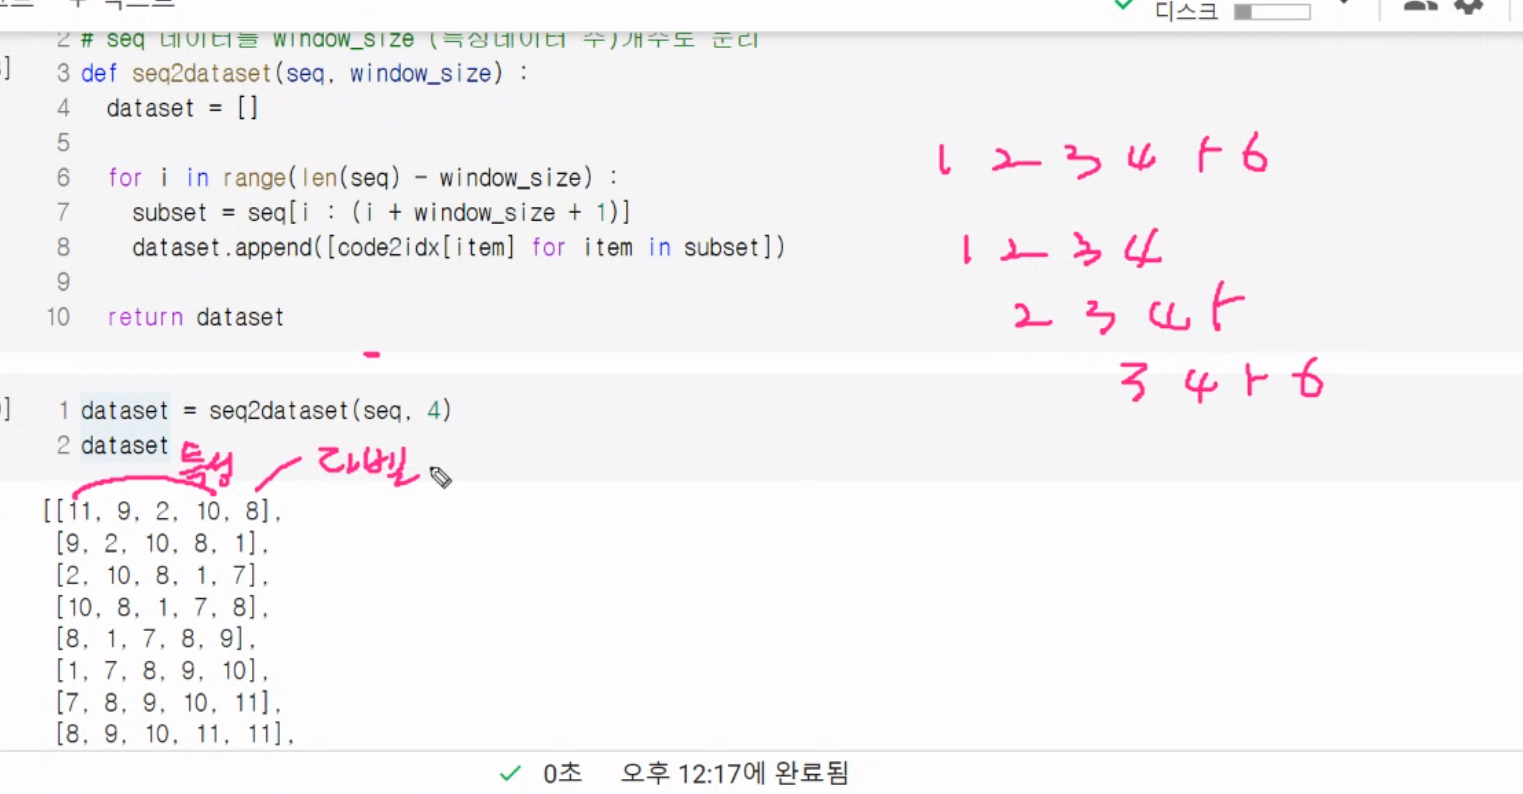

In [10]:
dataset=np.array(seq2dataset(seq, 4))
print(dataset.shape)
print(dataset)

(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]


In [32]:
# 특성과 라벨로 분리 
X= dataset[:,:-1]
y=dataset[:,-1]

X.shape, y.shape

((50, 4), (50,))

In [33]:
from tensorflow.keras.utils import to_categorical

#음표의 인덱스를 정규화
max_idx_value=13

X=X/ float(max_idx_value)
y_en=to_categorical(y)

X.shape, y.shape

((50, 4), (50,))

# 신경망 설계


- RNN을 사용할 때는 시간 차원을 추가해야 한다.

In [34]:
X_ex=np.reshape(X,(50,4,1))

X_ex.shape

(50, 4, 1)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout

model1=Sequential()

#stateful=True: 앞단의 결과를 다음단으로 넘긴다. 
model1.add(LSTM(128, batch_input_shape=(1,4,1), stateful=True))

model1.add(Dense(12, activation="softmax"))

In [36]:
model1.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [37]:
for epoch_idx in range(500):
  #shuffle=False: 데이터를 섞지 말라고 설정
  model1.fit(X_ex,y_en,epochs=1, batch_size=1,shuffle=False)
  #reset_states():상태를 리셋
  model1.reset_states()

50/50 [==============================] - 0s 4ms/step - loss: 4.3487e-06 - accuracy: 1.0000


In [38]:
pred_count = 50  # 최대 예측 개수 정의
# 한 스텝 예측
seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model1.predict(X_ex, batch_size=1)
for i in range(pred_count):
    idx = np.argmax(pred_out[i])  # one-hot 인코딩을 인덱스 값으로 변환
    # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    seq_out.append(idx2code[idx])
print("예측데이터 : ", seq_out)
print("실제데이터 : ", seq)

50/50 [==============================] - 1s 2ms/step
예측데이터 :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
실제데이터 :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [39]:
play_sound(seq_out)

Output hidden; open in https://colab.research.google.com to view.